In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [45]:
filepath = '/content/sample_data/CH22_Demand_XY_Train.csv'
macro_data = pd.read_csv(filepath, parse_dates=['DateTime'], index_col='DateTime')
print(macro_data.shape)  # (123, 8)
macro_data.head()

(41932, 5)


X1     X2      X3      X4             Y
DateTime                                                          
2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  521163.83540
2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  449066.62018
2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  437394.72159
2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  422107.63292
2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  406923.83540

In [46]:
macro_data = macro_data[['Y','X1', 'X2']]
print(macro_data.shape)
train_df=macro_data[:int(0.8*macro_data.shape[0])]
test_df=macro_data[int(0.8*macro_data.shape[0]):]
print(test_df.shape)
print(train_df.shape)

(41932, 3)
(8387, 3)
(33545, 3)


In [47]:
var_model = VARMAX(train_df ,enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:      ['Y', 'X1', 'X2']   No. Observations:                33545
Model:                         VAR(1)   Log Likelihood             -314297.180
                          + intercept   AIC                         628630.360
Date:                Sat, 29 Jan 2022   BIC                         628781.932
Time:                        14:31:04   HQIC                        628678.737
Sample:                    01-01-2022                                         
                         - 08-21-2022                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):          61912.05, 32158.56, 1557.06   Jarque-Bera (JB):   1387815.42, 66610.05, 855873.19
Prob(Q):                           0.00, 0.00, 0.00   Prob(JB):                          0.00, 0.00, 0.00
Heteroskedasticity (H):            1.12, 1.03, 0.95   Skew:                  

In [48]:
n_forecast = 8387
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [49]:
predictions.columns=['Yp','X1p','X2p']
predictions

Yp       X1p        X2p
2022-08-21 22:50:00  671151.599325  7.902146  10.766283
2022-08-21 23:00:00  670727.118813  7.887642  10.802479
2022-08-21 23:10:00  670290.116086  7.873157  10.838586
2022-08-21 23:20:00  669840.733904  7.858691  10.874601
2022-08-21 23:30:00  669379.115246  7.844246  10.910519
...                            ...       ...        ...
2022-10-19 03:50:00  500833.602497  6.208816  12.501522
2022-10-19 04:00:00  500833.596761  6.208816  12.501522
2022-10-19 04:10:00  500833.591030  6.208815  12.501522
2022-10-19 04:20:00  500833.585305  6.208815  12.501522
2022-10-19 04:30:00  500833.579585  6.208815  12.501522

[8387 rows x 3 columns]

In [50]:
test_vs_pred=pd.concat([test_df["Y"],predictions["Yp"]],axis=1)

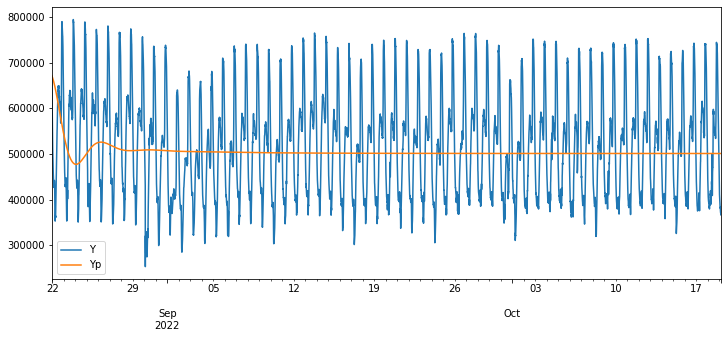

In [51]:
test_vs_pred.plot(figsize=(12,5))

In [52]:


from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['Yp'],test_df['Y']))
print('Mean value of Y is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Y']),rmse_ulc))

Mean value of Y is : 517763.7391511363. Root Mean Squared Error is :114760.45797840951
